In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#import pyEXP
#import k3d
#import agama
from scipy.optimize import curve_fit 
import pickle 
import matplotlib.pylab as pl
#import EXPtools
#import EXP_utils
import pandas as pd
%matplotlib inline

In [8]:
plt.style.use('./../../MW_viz/matplotlib.mplstyle')

In [4]:
def add_colorbar(mappable, label=None):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    if(label != None): 
        cbar = fig.colorbar(mappable, cax=cax,label=label)
    else:
        cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

In [6]:
DATA = './NICO_PICKLE/'

In [87]:
with open(DATA+'orbits_rotated.pickle', 'rb') as f:
    orbits = pickle.load(f)

with open(DATA+'angular_momentum_rotated.pickle', 'rb') as f:
    angular_momentum = pickle.load(f)

with open(DATA+'start_snap.pickle', 'rb') as f:
    start_snap = pickle.load(f)

with open(DATA+'coeffs_0_dict.pickle', 'rb') as f:
    coeffs_0_dict = pickle.load(f)

with open(DATA+'coeffs_1_dict.pickle', 'rb') as f:
    coeffs_1_dict =  pickle.load(f)

with open(DATA+'coeffs_2_dict.pickle', 'rb') as f:
    coeffs_2_dict = pickle.load(f)
    
with open(DATA+'triaxiality_all_dict.pickle', 'rb') as f:
    triaxiality_all_dict  = pickle.load(f)

with open(DATA+'angles_all_dict.pickle', 'rb') as f:
    angles_all_dict = pickle.load(f)
    
with open(DATA+'b_to_a_dict.pickle', 'rb') as f:
    b_to_a_dict = pickle.load(f)
    
with open(DATA+'c_to_a_dict.pickle', 'rb') as f:
    c_to_a_dict = pickle.load(f)
    
with open(DATA+'b_to_a_dict_symphony.pickle', 'rb') as f:
    b_to_a_dict_symphony =  pickle.load(f)

with open(DATA+'c_to_a_dict_symphony.pickle', 'rb') as f:
    c_to_a_dict_symphony =  pickle.load(f)


with open(DATA+'merger_ratios.pickle', 'rb') as f:
    merger_ratios =  pickle.load(f)
    
with open(DATA+'times.pickle', 'rb') as f:
    times =  pickle.load(f)

with open(DATA+'tpericenter.pickle', 'rb') as f:
    tpericenter = pickle.load(f)

with open(DATA+'dpericenter.pickle', 'rb') as f:
    dpericenter = pickle.load(f)
    

In [9]:
Halos_to_Analyze = ['Halo004', 'Halo113', 'Halo169', 'Halo170', 'Halo222', 'Halo229', 
                   'Halo282', 'Halo327', 'Halo349', 'Halo407', 'Halo659', 'Halo666', 'Halo747',
                   'Halo756', 'Halo719', 'Halo788', 'Halo975', 'Halo983']

In [20]:
r = np.sqrt(np.sum(orbits[halo]**2, axis=1))


In [38]:
plt.subplots?

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False

Halo004
Halo113
Halo169
Halo170
Halo222
Halo229
Halo282
Halo327
Halo349
Halo407
Halo659
Halo666
Halo747
Halo756
Halo719
Halo788
Halo975
Halo983


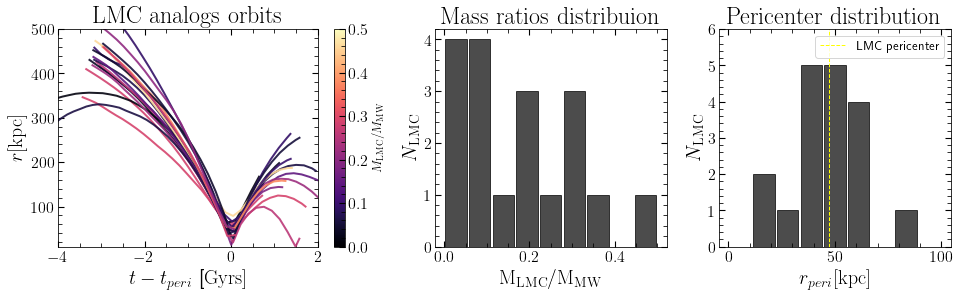

"\nfig, ax = plt.subplots(2, 1, figsize=(8,6))\nfor halo in Halos_to_Analyze: \n    print(halo)\n    imp = merger_ratios[halo]  #np.log10(tidal_index[halo]) #merger_ratios[halo] \n    peris.append(imp)\n    norm_imp = imp*2 \n    r = np.sqrt(np.sum(orbits[halo]**2, axis=1))\n    ax[0].plot(times[halo]-tpericenter[halo], r, color= pl.cm.magma(norm_imp), lw=2)\n#    plt.axvline(tpericenter[halo], ls='--', c='k')\nax[1].hist(peris, color='k', alpha=0.5, bins=np.linspace(0,0.5, 6))\ncbar = ax[0].scatter([-5]*len(peris), [-5]*len(peris), c=peris, vmin=np.min(peris), vmax=np.max(peris), cmap='magma')\nax[0].set_ylim([10,500])\nax[0].set_xlim([-4,2])\n#ax[0].set_xscale('log')\n#add_colorbar(cbar, label=r'$M_{\rm LMC}/M_{\rm MW}$')\n#plt.yscale('log')\n#plt.xlim()\nax[1].set_ylabel(r'$N_{\rm LMC}$')\nax[1].set_xlabel(r'$M_{\rm LMC}/M_{\rm MW}$')\nax[0].set_ylabel('r [kpc]')\n#ax[0].set_xlabel(r'$t - t_{peri}$ [Gyrs]')\n#plt.savefig('lmc_orbits2.png', dpi=300)\nplt.show()\n"

In [77]:
peris= []
mratios = []

vmin = 0
vmax = 0.5

fig, ax = plt.subplots(1, 3, figsize=(16,4), width_ratios=[1.4, 1, 1])
for halo in Halos_to_Analyze: 
    print(halo)
    imp = merger_ratios[halo]  #np.log10(tidal_index[halo]) #merger_ratios[halo] 
    mratios.append(imp)
    norm_imp = (imp-vmin)/(vmax-vmin)
    r = np.sqrt(np.sum(orbits[halo]**2, axis=1))
    ax[0].plot(times[halo]-tpericenter[halo], r, color= pl.cm.magma(norm_imp), lw=2, alpha=0.9)
    dt = times[halo]-tpericenter[halo]
    tperi, = np.where(dt<0.3)
    rperi = np.min(r[tperi])
    peris.append(rperi)
#    plt.axvline(tpericenter[halo], ls='--', c='k')
ax[1].hist(mratios, color='k', alpha=0.7, bins=np.linspace(0,0.5, 10), edgecolor = "black", rwidth=0.9)
ax[2].hist(peris, color='k', alpha=0.7, bins=np.linspace(0,100,10), edgecolor = "black", rwidth=0.9)
ax[2].axvline(47, lw=1, c='yellow', label='LMC pericenter', ls='--')
cbar = ax[0].scatter([-5]*len(mratios), [-5]*len(mratios), c=peris, vmin=vmin, vmax=vmax, cmap='magma')
ax[0].set_ylim([10,500])
ax[0].set_xlim([-4,2])
ax[2].set_ylim([0,6])

ax[2].legend(fontsize=13)
#ax[0].set_xscale('log')
cbar = fig.colorbar(cbar)
cbar.set_label(r'$M_{\rm LMC}/M_{\rm MW}$', fontsize=13)

#add_colorbar(cbar, label=r'$M_{\rm LMC}/M_{\rm MW}$')
#plt.yscale('log')
#plt.xlim()
ax[1].set_ylabel(r'$N_{\rm LMC}$')
ax[1].set_xlabel(r'$\rm{M}_{\rm LMC}/\rm{M}_{\rm MW}$')
ax[2].set_xlabel(r'$r_{peri} [\rm{kpc}]$')
ax[2].set_ylabel(r'$N_{\rm LMC}$')
ax[0].set_ylabel(r'$r\rm{[kpc]}$')
ax[0].set_xlabel(r'$t - t_{peri}$ [\rm{Gyrs}]')
ax[0].set_title(r'$\rm{LMC\ analogs\ orbits}$')
ax[1].set_title(r'$\rm{Mass\ ratios\ distribuion}$')
ax[2].set_title(r'$\rm{Pericenter\ distribution}$')

plt.savefig('lmc_orbits.png', dpi=300, bbox_inches='tight')
plt.savefig('lmc_orbits.pdf', dpi=300, bbox_inches='tight')

plt.show()
"""
fig, ax = plt.subplots(2, 1, figsize=(8,6))
for halo in Halos_to_Analyze: 
    print(halo)
    imp = merger_ratios[halo]  #np.log10(tidal_index[halo]) #merger_ratios[halo] 
    peris.append(imp)
    norm_imp = imp*2 
    r = np.sqrt(np.sum(orbits[halo]**2, axis=1))
    ax[0].plot(times[halo]-tpericenter[halo], r, color= pl.cm.magma(norm_imp), lw=2)
#    plt.axvline(tpericenter[halo], ls='--', c='k')
ax[1].hist(peris, color='k', alpha=0.5, bins=np.linspace(0,0.5, 6))
cbar = ax[0].scatter([-5]*len(peris), [-5]*len(peris), c=peris, vmin=np.min(peris), vmax=np.max(peris), cmap='magma')
ax[0].set_ylim([10,500])
ax[0].set_xlim([-4,2])
#ax[0].set_xscale('log')
#add_colorbar(cbar, label=r'$M_{\rm LMC}/M_{\rm MW}$')
#plt.yscale('log')
#plt.xlim()
ax[1].set_ylabel(r'$N_{\rm LMC}$')
ax[1].set_xlabel(r'$M_{\rm LMC}/M_{\rm MW}$')
ax[0].set_ylabel('r [kpc]')
#ax[0].set_xlabel(r'$t - t_{peri}$ [Gyrs]')
#plt.savefig('lmc_orbits2.png', dpi=300)
plt.show()
"""

In [31]:
plt.hist?

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

In [40]:
markers = ['o', '^', 'v', '<', '1',  '2', '3',  '>', 'h','s','p','P', '*', 'X', 'd', '+', 'x','4',]

12
18
23
14
19
25
15
21
27
13
19
24
14
20
72
77
13
18
14
20
25
14
20
26
11
17
22
57
63
68
13
19
24
12
18
23
13
19
24
12
18
23
13
12
17
12
18


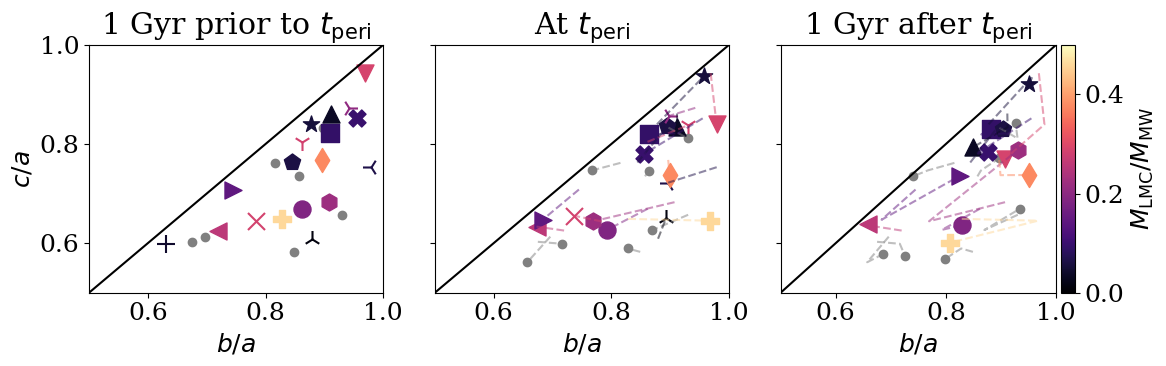

In [41]:
peris= []
fig, ax = plt.subplots(1, 3, figsize=(12,4),sharey=True)
vmin = 0
vmax = 0.5

for key in c_to_a_dict_symphony.keys():
    ax[1].scatter(b_to_a_dict_symphony[key][1],c_to_a_dict_symphony[key][1], marker='o',c='gray')
    ax[2].scatter(b_to_a_dict_symphony[key][2],c_to_a_dict_symphony[key][2], marker='o',c='gray')
    ax[0].scatter(b_to_a_dict_symphony[key][0],c_to_a_dict_symphony[key][0], marker='o',c='gray')
    ax[2].plot(b_to_a_dict_symphony[key],c_to_a_dict_symphony[key],alpha=0.5, ls='--',color='gray')
    ax[1].plot(b_to_a_dict_symphony[key][:2],c_to_a_dict_symphony[key][:2],alpha=0.5, ls='--',color='gray')

for i, halo in enumerate(Halos_to_Analyze): 

    imp = merger_ratios[halo]  #np.log10(tidal_index[halo]) #merger_ratios[halo] 
    peris.append(imp)
    norm_imp = (imp-vmin)/(vmax-vmin)
    r = np.sqrt(np.sum(orbits[halo]**2, axis=1))
    T = (1-np.array(b_to_a_dict[halo])**2)/(1-np.array(c_to_a_dict[halo])**2)
    tt = times[halo]-tpericenter[halo]
    arg = np.argmin(np.abs(tt+1))
    ax[0].scatter(b_to_a_dict[halo][arg], c_to_a_dict[halo][arg], color= pl.cm.magma(norm_imp), s=150, marker=markers[i])
    b_to_a = []
    c_to_a = []
    b_to_a.append(b_to_a_dict[halo][arg])
    c_to_a.append(c_to_a_dict[halo][arg])
    print(arg)
    if(np.max(tt>0)):
        arg = np.argmin(np.abs(tt))
        ax[1].scatter(b_to_a_dict[halo][arg], c_to_a_dict[halo][arg], color= pl.cm.magma(norm_imp), s=150, marker=markers[i])
        b_to_a.append(b_to_a_dict[halo][arg])
        c_to_a.append(c_to_a_dict[halo][arg])
        ax[1].plot(b_to_a, c_to_a, color= pl.cm.magma(norm_imp),alpha=0.5, ls='--')
        print(arg)
    if(np.max(tt>1.0)):
        arg = np.argmin(np.abs(tt-1.0))

        b_to_a.append(b_to_a_dict[halo][arg])
        c_to_a.append(c_to_a_dict[halo][arg])
        ax[2].plot(b_to_a, c_to_a, color= pl.cm.magma(norm_imp),alpha=0.5, ls='--')
        ax[2].scatter(b_to_a_dict[halo][arg], c_to_a_dict[halo][arg], color= pl.cm.magma(norm_imp), s=150, marker=markers[i])
        print(arg)
#    plt.axvline(tpericenter[halo], ls='--', c='k')
#ax.hist(peris, color='k', alpha=0.5, bins=np.linspace(0,0.5, 6))
cbar = ax[2].scatter([-5]*len(peris), [-5]*len(peris), c=peris, vmin=vmin, vmax=vmax, cmap='magma')
ax[0].set_ylim([0.5,1])
ax[0].set_xlim([0.5,1])

ax[1].set_ylim([0.5,1])
ax[1].set_xlim([0.5,1])

ax[2].set_ylim([0.5,1])
ax[2].set_xlim([0.5,1])
#ax[0].set_xscale('log')
add_colorbar(cbar, label=r'$M_{\rm LMC}/M_{\rm MW}$')
x = np.linspace(0,1,10)
ax[0].plot(x,x,c='k')
ax[1].plot(x,x,c='k')
ax[2].plot(x,x,c='k')
ax[0].set_ylabel('$c/a$')
ax[0].set_xlabel('$b/a$')
ax[1].set_xlabel('$b/a$')
ax[2].set_xlabel('$b/a$')
ax[0].set_title(r'1 Gyr prior to $t_{\rm peri}$')
ax[1].set_title(r'At $t_{\rm peri}$')
ax[2].set_title(r'1 Gyr after $t_{\rm peri}$')

#ax.set_ylabel('r [kpc]')
#ax.set_xlabel(r'$t - t_{peri}$ [Gyrs]')
#plt.axvline(0, ls='dotted', lw=1, c='k')
plt.tight_layout()
plt.savefig('axis_ratios2.png', dpi=300)
plt.show()

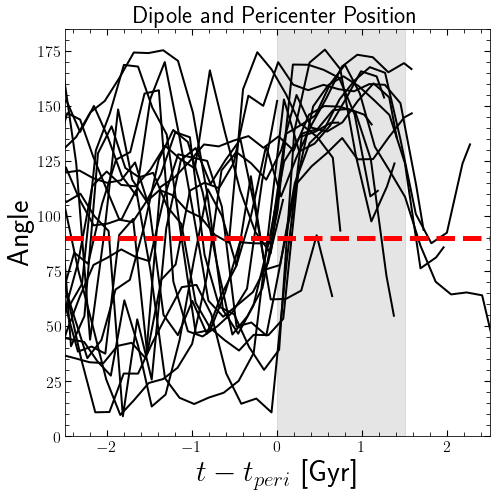

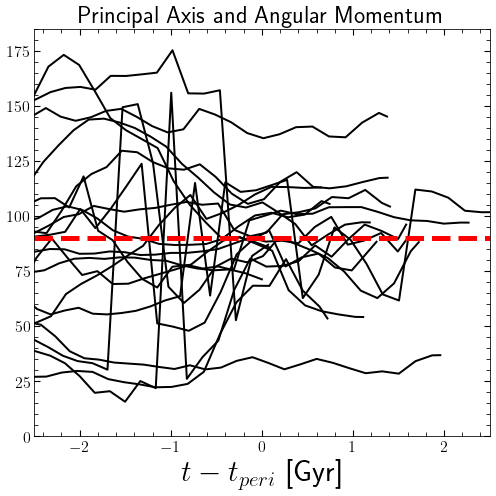

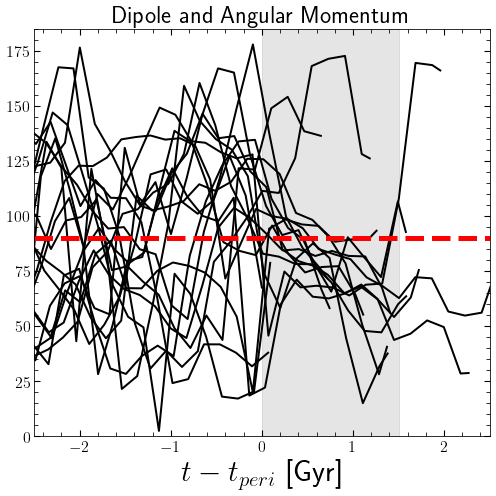

In [89]:
plt.figure(figsize=(7,7))
angles1 = []
times_all = []
for halo in Halos_to_Analyze:

    v1 = -angles_all_dict[halo]/np.linalg.norm(angles_all_dict[halo], axis=0)

    arg = np.argmin(np.abs(times[halo]-tpericenter[halo]))
    v2 = orbits[halo][arg] 

    v2 = v2/np.linalg.norm(v2)
    v2 = np.reshape(v2, (3,1))

    v2 = np.repeat(v2, len(v1[1]), axis=1)

    a = np.degrees(np.arccos((v1 * v2).sum(axis=0)))
    tt = times[halo]-tpericenter[halo]
    angles1.append(a)
    times_all.append(tt)
    imp = merger_ratios[halo]  #np.log10(tidal_index[halo]) #merger_ratios[halo] 
    
    norm_imp = imp*2 
    
    plt.plot(tt, a, color= 'k', lw=2)
plt.axhline(90, c='r', lw=5, ls='--')
plt.xlim([-2.5,2.5])
plt.ylim([0,185])
plt.xlabel('$t-t_{peri}$ [Gyr]', fontsize=30)
plt.title('Dipole and Pericenter Position')
plt.ylabel('Angle', fontsize=30)

#plt.title('Angle Between Dipole and Pericenter')
plt.fill_between([0, 1.5], [0,0], [185, 185], color='k', alpha=0.1)
plt.tight_layout()
plt.savefig('dipole_orientation.png', dpi=300)

plt.show()

plt.figure(figsize=(7,7))

angles = []
for halo in Halos_to_Analyze:

    v1 = np.array(triaxiality_all_dict[halo]).T
    v2 = np.array(angular_momentum[halo]).T 
    
    v1 = v1/np.linalg.norm(v1, axis=0)
    v2 = v2/np.linalg.norm(v2, axis=0)

    a = np.degrees(np.arccos((v1 * v2).sum(axis=0)))
    angles.append(a)
    tt = times[halo]-tpericenter[halo]
    imp = merger_ratios[halo]  #np.log10(tidal_index[halo]) #merger_ratios[halo] 
    
    norm_imp = imp*2 
    
    P = np.array(coeffs_2_dict[halo])/np.array(coeffs_0_dict[halo])
    arg = np.argmin(np.abs(tt+0.5))

    off = (P[arg])

    
    plt.plot(tt, a, color= 'k', lw=2) #pl.cm.magma(off*200), lw=2)     
plt.axhline(90, c='r', lw=5, ls='--')
plt.xlim([-2.5,2.5])
plt.ylim([0,185])
plt.xlabel('$t-t_{peri}$ [Gyr]', fontsize=30)
plt.title('Principal Axis and Angular Momentum')
#plt.title('Angle Between Principal Axis and Angular Momentum')
plt.tight_layout()

plt.savefig('quadrupole_orientation.png', dpi=300)
plt.show()


plt.figure(figsize=(7,7))

for halo in Halos_to_Analyze:

    v1 = angles_all_dict[halo]
    v2 = np.array(angular_momentum[halo]).T

    v1 = v1/np.linalg.norm(v1, axis=0)
    v2 = v2/np.linalg.norm(v2, axis=0)
    
    a = np.degrees(np.arccos((v1 * v2).sum(axis=0)))
    tt = times[halo]-tpericenter[halo]
    imp = merger_ratios[halo]  #np.log10(tidal_index[halo]) #merger_ratios[halo] 
    
    norm_imp = imp*2 
    
    plt.plot(tt, a, color= 'k', lw=2)    
plt.axhline(90, c='r', lw=5, ls='--')
plt.xlim([-2.5,2.5])
plt.ylim([0,185])
plt.xlabel('$t-t_{peri}$ [Gyr]', fontsize=30)
plt.title('Dipole and Angular Momentum')
plt.fill_between([0, 1.5], [0,0], [185, 185], color='k', alpha=0.1)

#plt.title('Angle Between Dipole and Angular Momentum')
plt.tight_layout()

plt.savefig('dipole_orientation2.png', dpi=300)
plt.show()

In [100]:
tmin = np.min(times_all[0])
tmax = np.max(times_all[0])

tlim1 = round(tmin, 2)
tlim2 = round(tmax, 2)
print(tlim1, tmin)
print(tlim2, tmax)

-3.04 -3.041911394986551
1.18 1.1844027776843262


In [109]:
interp1d?

Init signature:
interp1d(
    x,
    y,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=None,
    fill_value=nan,
    assume_sorted=False,
)
Docstring:     
Interpolate a 1-D function.

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Parameters
----------
x : (N,) array_like
    A 1-D array of real values.
y : (...,N,...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`.
kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specifying the order of the spline interpolator to use.
    The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
    'slinear', 'quadratic', 'cubic', 'previous', or 'next'. 'zero',
    'slinear', 'quadratic' and 'cubic' refer to a spline interpolation of
    zeroth, first, 

In [130]:
from scipy.interpolate import interp1d
def interpolate_time(t, angles):
    f = interp1d(t, angles, kind='cubic')
    tmin = np.min(t)
    tmax = np.max(t)
    
    tlim1 = round(tmin, 2)
    tlim2 = round(tmax, 2)
    t_new = np.arange(tlim1, tlim2, 0.001)
    a_new = f(t_new)
    return a_new, t_new

In [139]:
tinterp = np.arange(-3.5, 2.5, 0.001)
tall = np.zeros((len(Halos_to_Analyze), len(tinterp)))
ainterp = np.zeros_like(tall)

alls = []
talls = []
for i in range(len(Halos_to_Analyze)):
    a1, t1 = interpolate_time(times_all[0], angles[0]);
    alls.append(a1)
    talls.append(t1)

In [144]:
for k in range(len(Halos_to_Analyze)):
    for i in range(len(tinterp)):
        for j in range(len(tall[k])):
            if tall[k][j] == tinterp[i]:
                ainterp[k][i] = alls[k][j]
            else:
                ainterp[k][i] = 'nan'
        

In [155]:
ainterp[0][900:]

array([nan, nan, nan, ..., nan, nan, nan])

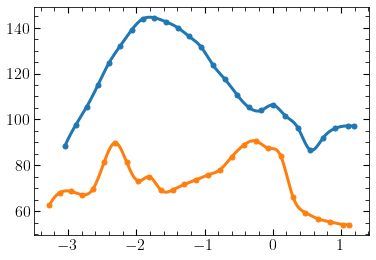

In [133]:
plt.plot(t1, a1)
plt.scatter(times_all[0], angles[0])

plt.plot(t2, a2)
plt.scatter(times_all[1], angles[1])

In [134]:
t1

array([-3.04 , -3.039, -3.038, ...,  1.177,  1.178,  1.179])

In [135]:
t2

array([-3.27 , -3.269, -3.268, ...,  1.107,  1.108,  1.109])

In [85]:
for i in range(len(angles)):
    print(len(angles[i]))

26
27
32
29
25
82
24
34
37
26
75
28
28
28
26
20
19
19


In [43]:
mwconfig = """
id: sphereSL
parameters:
  numr: 500
  rmin: 0.01
  rmax: 600
  Lmax: 4
  nmax: 15
  scale: 40.85
  modelname: SLGrid.empirical.halo.isolate.mwlmc5v12
  cachename: .slgrid_sph_cache_halo_mwlmc5v12
"""

In [44]:
coeff_filename = 'MWLMC5_halov12.h5'

mwcoefs = pyEXP.coefs.Coefs.factory(coeff_filename)


In [45]:
mwbasis = pyEXP.basis.Basis.factory(mwconfig)


---- SLGridSph::ReadH5Cache: successfully read basis cache <.slgrid_sph_cache_halo_mwlmc5v12>


In [46]:
GC23_times = mwcoefs.Times()
GC23_power = mwcoefs.Power()


In [47]:
with open('times_symphony.pickle', 'rb') as f:
    times_symphony =  pickle.load(f)
    
with open('coefficients_0_symphony.pickle', 'rb') as f:
    coeffs_0_symphony =  pickle.load(f)
    
with open('coefficients_1_symphony.pickle', 'rb') as f:
    coeffs_1_symphony =  pickle.load(f)
    
with open('coefficients_2_symphony.pickle', 'rb') as f:
    coeffs_2_symphony =  pickle.load(f)

In [48]:
coeffs_0_symphony.keys()

dict_keys(['Halo023', 'Halo247', 'Halo268', 'Halo364', 'Halo567', 'Halo825', 'Halo926', 'Halo990'])

In [49]:
times_symphony.keys()

dict_keys(['Halo023', 'Halo247', 'Halo268', 'Halo364', 'Halo567', 'Halo825', 'Halo926', 'Halo990'])

0.6290310163491512
0.814826464771844
0.845328371536758
0.6341857590018898
0.7846637843468356
0.6549864466287685
0.7048207889454015
0.509125369809323
0.7033040811412674
0.8058078715826503
0.7463943016072453
0.541858689520364
0.8260613186516468
0.8317902949247182
0.7502373034724198
0.5998423146099727
0.6613458283044578
0.7398605322652424


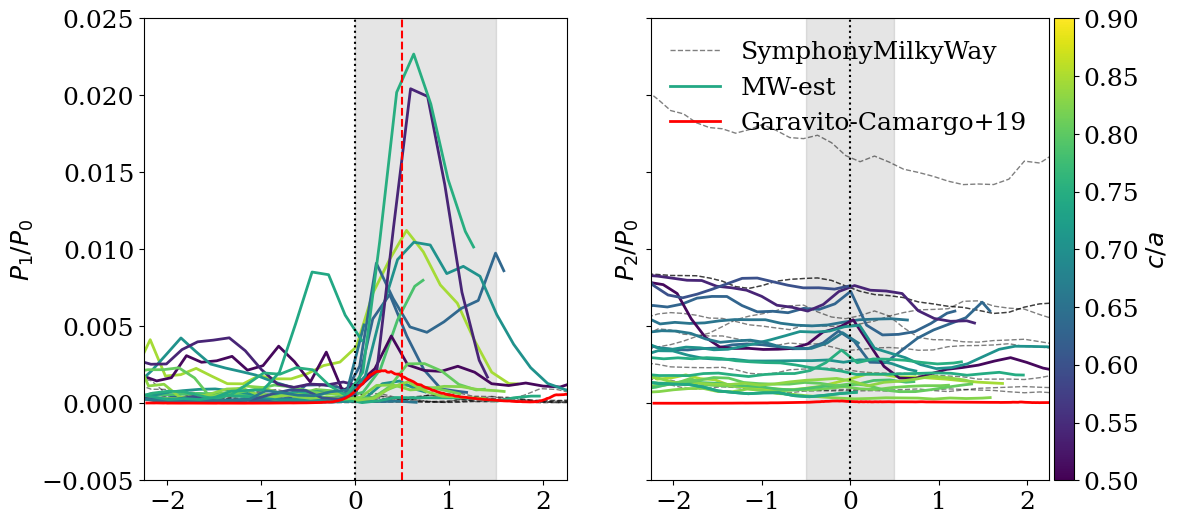

In [50]:


fig, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
for halo in coeffs_0_symphony.keys():
    med = np.median(np.array(coeffs_2_symphony[halo])/np.array(coeffs_0_symphony[halo]))
    norm_imp = 150*med #(imp-min_imp)/(max_imp-min_imp)

    back = len(coeffs_1_symphony[halo])
    ax[0].plot(-times_symphony[halo][-back:]+2.5, np.array(coeffs_1_symphony[halo])/np.array(coeffs_0_symphony[halo]), color= 'k', alpha=0.5, ls='--',  lw=1)

    ax[1].plot(-times_symphony[halo][-back:]+2.5, np.array(coeffs_2_symphony[halo])/np.array(coeffs_0_symphony[halo]), color= 'k', alpha=0.5, ls='--',  lw=1)
ax[1].plot(-times_symphony[halo][-back:]+2.5, np.array(coeffs_2_symphony[halo])/np.array(coeffs_0_symphony[halo]), color= 'k', alpha=0.5, ls='--',  label='SymphonyMilkyWay', lw=1)

vmin = 0.5
vmax = 0.9
TRI = {}
for halo in Halos_to_Analyze:
#    if(start_snap[halo]< 200): continue 
    t = times[halo]-tpericenter[halo]
    
    arg = np.argmin(np.abs(t+1))
    mask1 = (t) > -3 
    mask2 = (t) < -1 
    mask = mask1&mask2
    
    imp = np.median(np.array(c_to_a_dict[halo])[mask])
    TRI[halo] = imp
#    imp = c_to_a_dict[halo][arg]#merger_ratios[halo]  #np.log10(tidal_index[halo]) #merger_ratios[halo] 
#    imp = (1-b_to_a_dict[halo][arg]**2)/(1-c_to_a_dict[halo][arg]**2)
    norm_imp = (imp-vmin)/(vmax-vmin)
    print(imp)#(imp-np.min(tidal_all))/(np.max(tidal_all)-np.min(tidal_all)) #2*imp 
    peris.append(imp)
    
    
    
    P = np.array(coeffs_1_dict[halo])/np.array(coeffs_0_dict[halo])

    off = 0 #(P[arg])

    df = pd.DataFrame(P-off)
    ax[0].plot(t,df.rolling(1).mean(), color= pl.cm.viridis(norm_imp), lw=2)

    
    P = np.array(coeffs_2_dict[halo])/np.array(coeffs_0_dict[halo])

    arg = np.argmin(np.abs(t+0.5))

    off = 0 # (P[arg])

    df = pd.DataFrame(P-off)
    arg = np.argmin(np.abs(t+1))

    ax[1].plot(t,df.rolling(1).mean(), color= pl.cm.viridis(norm_imp), lw=2)

cbar = ax[1].scatter([-5]*len(peris), [-5]*len(peris), c=peris, vmin=vmin, vmax=vmax, cmap='viridis')
add_colorbar(cbar, label='$c/a$')

ax[1].plot(t,df.rolling(1).mean(), color=pl.cm.viridis(norm_imp), lw=2, label='MW-est')


ax[0].plot(np.array(GC23_times)-2.22, GC23_power[:,1]/GC23_power[0,0], c='r', lw=2)
ax[1].plot(np.array(GC23_times)-2.22, GC23_power[:,2]/GC23_power[0,0], c='r', lw=2, label='Garavito-Camargo+19')

#plt.scatter([-5]*len(peris), [-5]*len(peris), c=peris, vmin=np.min(peris), vmax=np.max(peris), cmap='magma')
#ax[0].set_xlabel(r'$t-t_{\rm peri}$ [Gyrs]')
#ax[1].set_xlabel(r'$t-t_{\rm peri}$ [Gyrs]')
ax[0].set_ylabel('$P_1/P_0$')
ax[1].set_ylabel('$P_2/P_0$')

#ax[0].set_title('Power in $l=1$')
#ax[1].set_title('Power in $l=2$')
ax[0].axvline(0, ls='dotted', c='k')
ax[1].axvline(0, ls='dotted', c='k')
ax[1].legend(frameon=False)
ax[0].set_ylim([-0.005,0.025])
ax[0].set_xlim([-2.25, 2.25])
ax[1].fill_between([-.5,.5], [-0.005, -0.005],[0.025, 0.025], color='k', alpha=0.1)
ax[0].fill_between([0,1.5], [-0.005, -0.005],[0.025, 0.025], color='k', alpha=0.1)

#plt.fill_between([-.5,.5], [-0.005, -0.005],[0.005, 0.005], color='k', alpha=0.1)
plt.savefig('power_shifted_highlighted.png')
ax[0].axvline(0.5, c='r', ls='--')
plt.show()

0.36974790692329407
0.06970039755105972
0.5771737098693848
0.5117707252502441
0.568199872970581
0.12901392579078674
0.2860989272594452
0.4400235712528229
0.18349124491214752
0.9194512963294983
0.1073773130774498
0.19414456188678741
0.7522858381271362
0.5734681487083435


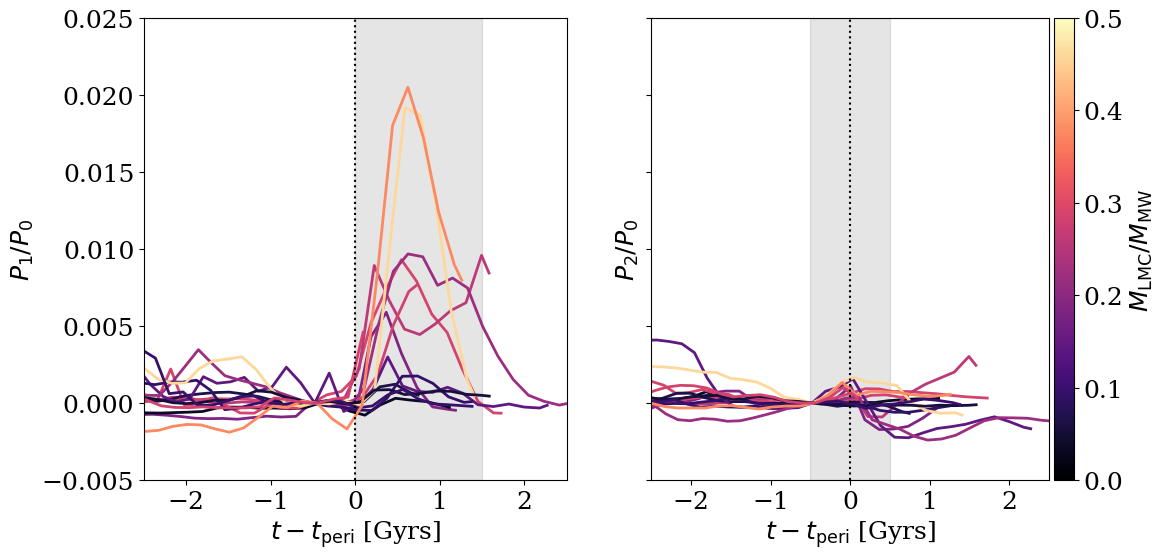

In [52]:
Halos_to_Analyze = ['Halo004', 'Halo113', 'Halo169', 'Halo170', 'Halo222', 'Halo229', 
                   'Halo282', 'Halo327', 'Halo349', 'Halo407', 'Halo659', 'Halo666', 'Halo747',
                   'Halo756', 'Halo719', 'Halo975']

fig, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

peris = []
vmin = 0
vmax = 0.5
for halo in Halos_to_Analyze:
    if(start_snap[halo]< 200): continue 
    arg = np.argmin(np.abs(t+1))
#    imp = c_to_a_dict[halo][arg] #merger_ratios[halo]  #np.log10(tidal_index[halo]) #merger_ratios[halo] 
    imp = merger_ratios[halo]
    norm_imp = (imp-vmin)/(vmax-vmin)
    print(norm_imp)#(imp-np.min(tidal_all))/(np.max(tidal_all)-np.min(tidal_all)) #2*imp 
    peris.append(imp)
    
    t = times[halo]-tpericenter[halo]
    
    P = np.array(coeffs_1_dict[halo])/np.array(coeffs_0_dict[halo])
    arg = np.argmin(np.abs(t+0.5))
    
    off = (P[arg])

    df = pd.DataFrame(P-off)
    ax[0].plot(t,df.rolling(1).mean(), color= pl.cm.magma(norm_imp), label=halo, lw=2)

    
    P = np.array(coeffs_2_dict[halo])/np.array(coeffs_0_dict[halo])

    arg = np.argmin(np.abs(t+0.5))

    off = (P[arg])
    df = pd.DataFrame(P-off)
    ax[1].plot(t,df.rolling(1).mean(), color= pl.cm.magma(norm_imp), label=halo, lw=2)

cbar = ax[1].scatter([-5]*len(peris), [-5]*len(peris), c=peris, vmin=vmin, vmax=vmax, cmap='magma')
add_colorbar(cbar, label=r'$M_{\rm LMC}/M_{\rm MW}$')
ax[0].set_xlabel(r'$t-t_{\rm peri}$ [Gyrs]')
ax[1].set_xlabel(r'$t-t_{\rm peri}$ [Gyrs]')
ax[0].set_ylabel('$P_1/P_0$')
ax[1].set_ylabel('$P_2/P_0$')

#ax[0].set_title('Power in $l=1$')
#ax[1].set_title('Power in $l=2$')
ax[0].axvline(0, ls='dotted', c='k')
ax[1].axvline(0, ls='dotted', c='k')

ax[0].set_ylim([-0.005,0.025])
ax[0].set_xlim([-2.5, 2.5])
ax[1].fill_between([-.5,.5], [-0.005, -0.005],[0.025, 0.025], color='k', alpha=0.1)
ax[0].fill_between([0,1.5], [-0.005, -0.005],[0.025, 0.025], color='k', alpha=0.1)

ax[1].scatter([-5]*len(peris), [-5]*len(peris), c=peris, vmin=np.min(peris), vmax=np.max(peris), cmap='magma')

#plt.fill_between([-.5,.5], [-0.005, -0.005],[0.005, 0.005], color='k', alpha=0.1)
plt.savefig('power_shifted_merger_ratio.png')

plt.show()

In [53]:
P2 = {}
for halo in Halos_to_Analyze:


    t = times[halo]-tpericenter[halo]
    P = np.array(coeffs_2_dict[halo])/np.array(coeffs_0_dict[halo])
    arg = np.argmin(np.abs(t+0.5))

    
    off = (P[arg])

    df = pd.DataFrame(P-off)
    mask = np.abs(t) < 0.5 
    P2[halo] = (np.max(df.rolling(1).mean()[mask]))



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [54]:
P1 = {}
t1 = {}


for halo in Halos_to_Analyze:


    t = times[halo]-tpericenter[halo]
    P = np.array(coeffs_1_dict[halo])/np.array(coeffs_0_dict[halo])
    
    arg = np.argmin(np.abs(t+0.5))

    
    off = (P[arg])

    df = pd.DataFrame(P-off)
    mask = t > 0
    mask1 = t < 1 
    mask = mask&mask1
    try:
        P1[halo] = (np.nanmax(df.rolling(1).mean()[mask]))
    except:
        P1[halo] = np.nan

In [56]:
t = np.array(GC23_times)-2.22
arg = np.argmin(np.abs(t+0.5))
P = GC23_power[:,2]/GC23_power[0,0]
off = (P[arg])

df = pd.DataFrame(P-off)
mask = np.abs(t) < 0.5 
P2_NICO = (np.max(df.rolling(1).mean()[mask]))

arg = np.argmin(np.abs(t))
P = GC23_power[:,1]/GC23_power[0,0]
off = (P[arg])

df = pd.DataFrame(P-off)
mask = t > 0
mask1 = t < 1 
mask = mask&mask1
P1_NICO = (np.max(df.rolling(1).mean()[mask]))



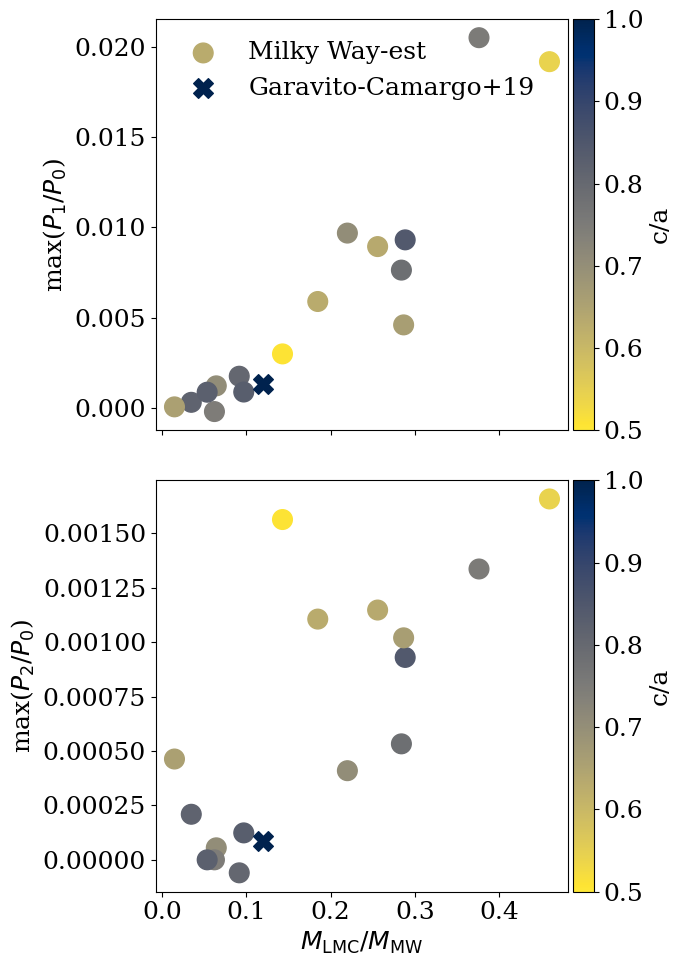

In [57]:
fig, ax = plt.subplots(2,1, figsize=(7,10),sharex=True)

x = []
y = []
c = []
for halo in Halos_to_Analyze:

    y.append(P1[halo])
    x.append((merger_ratios[halo]))
    c.append(TRI[halo])

cbar = ax[0].scatter(x,y, s=200, c=c, vmin=0.5, vmax=1.0, cmap='cividis_r', label='Milky Way-est')
add_colorbar(cbar, label='c/a')#plt.colorbar(label='$\log_{10}$ M$_{peak}$')
#plt.yscale('log')
ax[0].set_ylabel('max($P_1/P_0$)')
#ax[0].set_xlabel(r'$M_{\rm LMC}/M_{\rm MW}$')
#plt.savefig('power_l_1.png', dpi=300)
#plt.show()
ax[0].scatter(0.12, P1_NICO, c=1.0, cmap='cividis_r', vmin=0.5, vmax=1.0, marker='X', s=200, label='Garavito-Camargo+19')
ax[0].legend(frameon=False)
x = []
y = []
c = []
for halo in Halos_to_Analyze:

    y.append(P2[halo])
    x.append((merger_ratios[halo]))
    c.append(TRI[halo])

cbar = ax[1].scatter(x,y, s=200, c=c, vmin=0.5, vmax=1.0, cmap='cividis_r')
add_colorbar(cbar, label='c/a')
ax[1].scatter(0.12, P2_NICO, c=1.0, vmin=0.5, vmax=1.0, cmap='cividis_r', marker='X', s=200)


#plt.colorbar(label='$\log_{10}$ M$_{peak}$')
#plt.yscale('log')
ax[1].set_ylabel('max($P_2/P_0$)')
ax[1].set_xlabel(r'$M_{\rm LMC}/M_{\rm MW}$')
#ax[0].set_ylabel('Normalized Power')
#plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('power_l_2.png', dpi=300)
plt.show()

In [58]:
mergeRatios = np.loadtxt('merger_ratios.txt')
density_change1 = np.loadtxt('density_change1.txt')
density_change = np.loadtxt('density_change.txt')
potential_change1 = np.loadtxt('potential_change1.txt')
potential_change = np.loadtxt('potential_change.txt')
acceleration_change1 = np.loadtxt('acceleration_change1.txt')
acceleration_change = np.loadtxt('acceleration_change.txt')


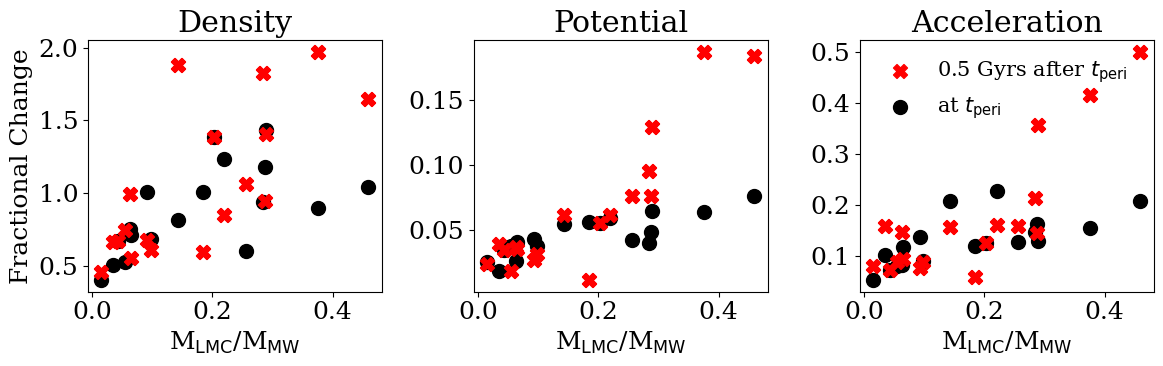

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(12,4), sharex=True, sharey=False)
ax[0].scatter(mergeRatios, density_change1, c='r', s=100, marker='X')
ax[1].scatter(mergeRatios, potential_change1, c='r', s=100, marker='X')
ax[2].scatter(mergeRatios, acceleration_change1, c='r', s=100, marker='X', label=r'0.5 Gyrs after $t_{\rm peri}$')

ax[0].scatter(mergeRatios, density_change, c='k', s=100)
ax[1].scatter(mergeRatios, potential_change, c='k', s=100)
ax[2].scatter(mergeRatios, acceleration_change, c='k', s=100, label=r'at $t_{\rm peri}$')
ax[0].scatter(mergeRatios, density_change1, c='r', s=100, marker='X')
ax[1].scatter(mergeRatios, potential_change1, c='r', s=100, marker='X')
ax[2].scatter(mergeRatios, acceleration_change1, c='r', s=100, marker='X')


ax[0].set_ylabel(r'Fractional Change')
ax[0].set_xlabel(r'M$_{\rm LMC}$/M$_{\rm MW}$')
ax[1].set_xlabel(r'M$_{\rm LMC}$/M$_{\rm MW}$')
ax[2].set_xlabel(r'M$_{\rm LMC}$/M$_{\rm MW}$')
ax[0].set_title('Density')
ax[1].set_title('Potential')
ax[2].set_title('Acceleration')
plt.legend(frameon=False, fontsize=15, loc='upper left')

plt.tight_layout()
plt.savefig('field_maximum_contrast2.png', dpi=300)